In [33]:
import numpy as ny
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data = pd.read_csv('/content/drive/MyDrive/Dataset.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [36]:
data=data[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.5+ KB


In [37]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
dtype: int64

Data Visualisation:

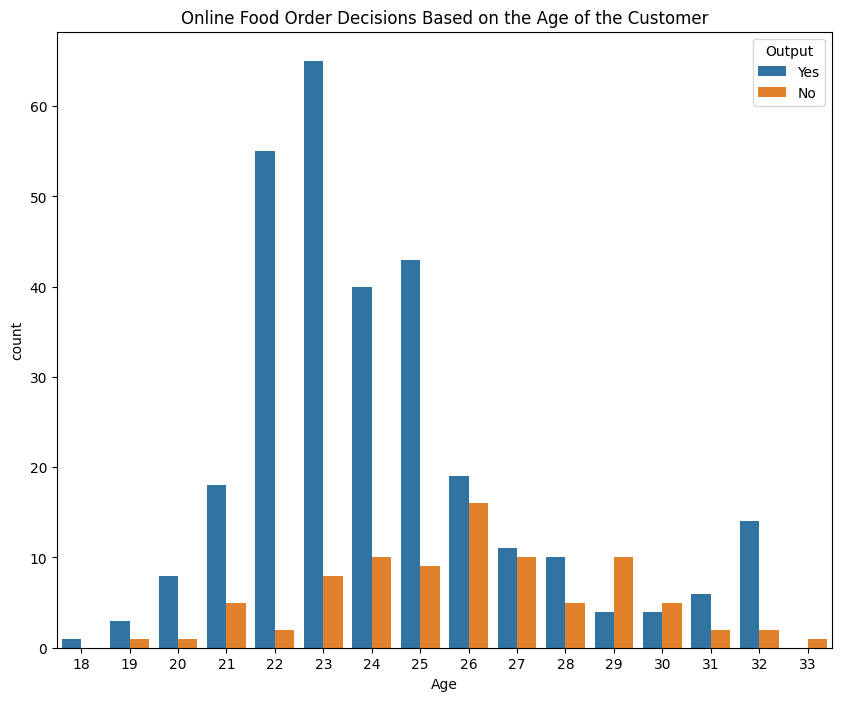

In [38]:
#Age
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sb.countplot(x='Age',data=data,hue='Output',palette="tab10");

We infer that the customers of the age group 22-25 are most likely to place an order.
This indicates that the online food delivery companies target this age group.

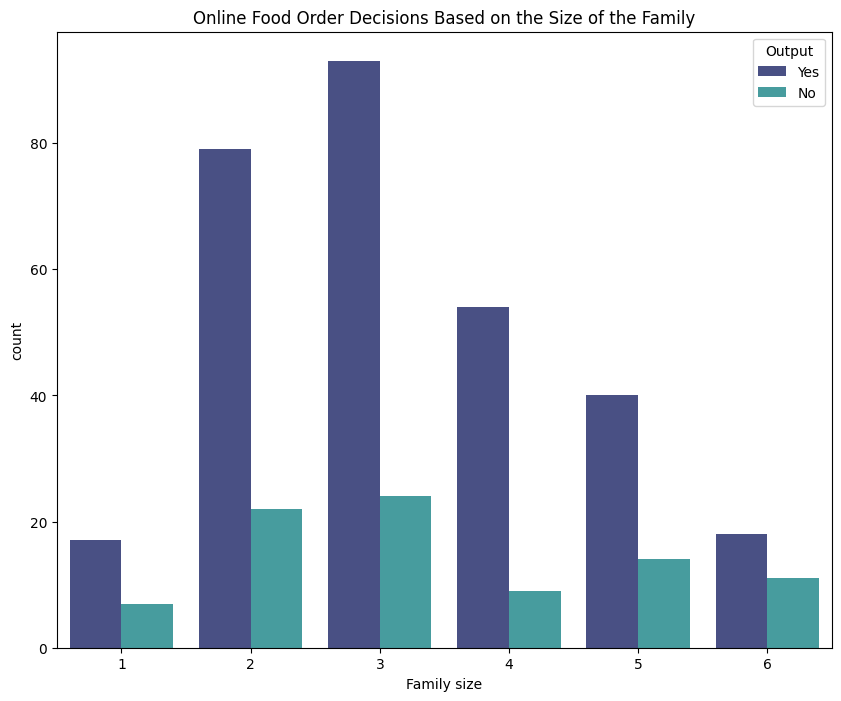

In [39]:
#Family size
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sb.countplot(x='Family size',data=data,hue='Output',palette="mako");

Families of 2-3 members tend to order more. These may be roommates,friends,couples or family of 3.

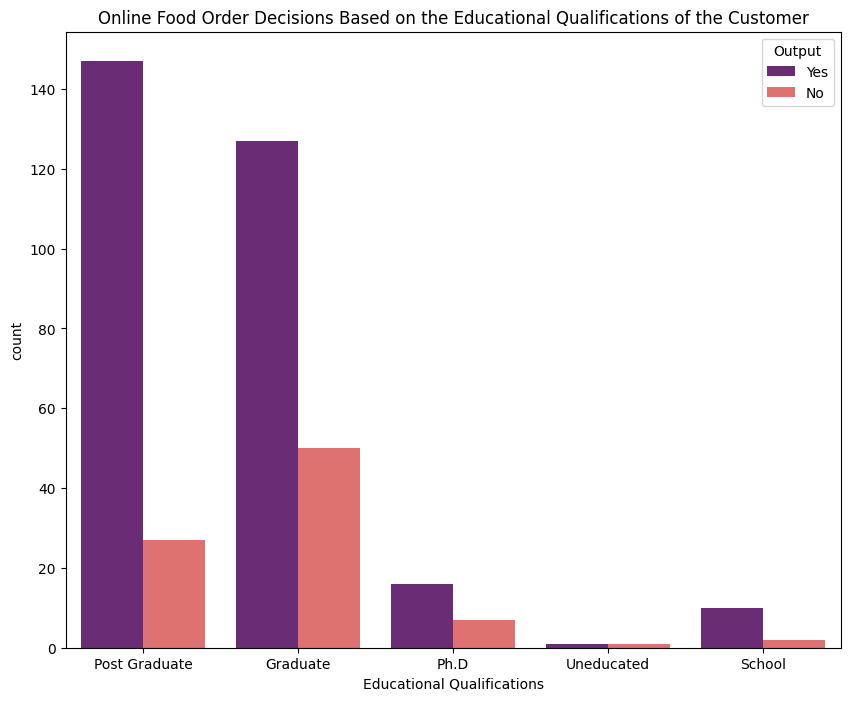

In [40]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sb.countplot(x='Educational Qualifications',data=data,hue='Output',palette="magma");

People who are graduates or post graduates are more likely to order. This shows the link between educational qualification and tendency of ordering.

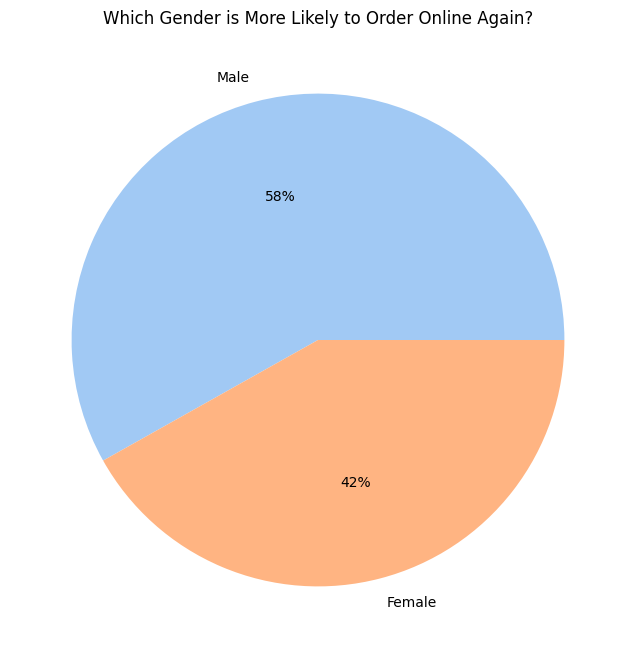

In [41]:
reorder = data[data["Output"] == "Yes"]
gender_data = reorder['Gender'].value_counts()
labels = gender_data.index
counts = gender_data.values
colors = sb.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
plt.title("Which Gender is More Likely to Order Online Again?")
plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Male users are more likely to order than female users.

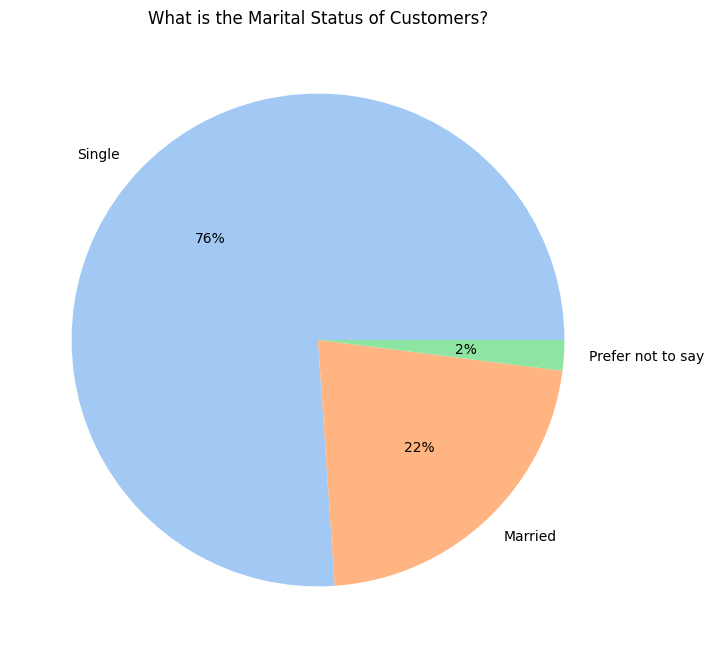

In [42]:
reorder = data[data["Output"] == "Yes"]
status_data = reorder['Marital Status'].value_counts()
labels = status_data.index
counts = status_data.values
colors = sb.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
plt.title("What is the Marital Status of Customers?")
plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


Bachelors tend to order more compared to married couples.

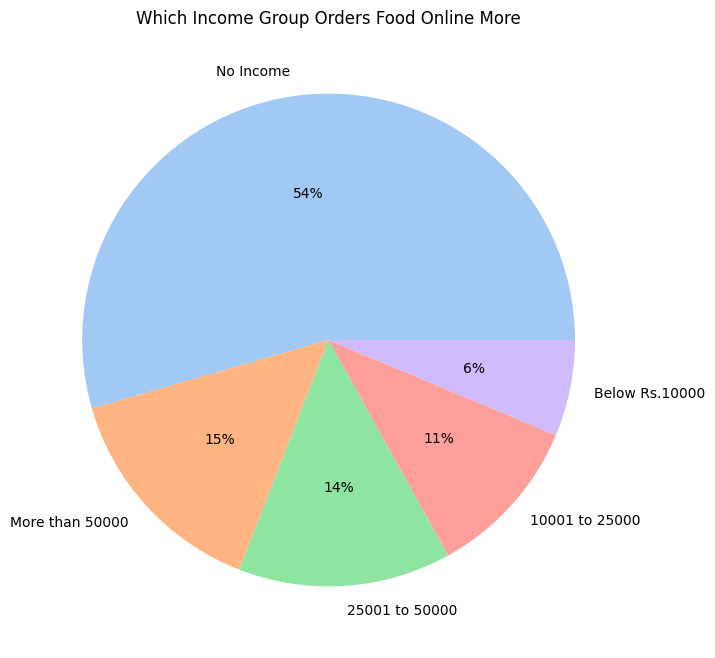

In [43]:
reorder = data[data["Output"] == "Yes"]
income_data = reorder['Monthly Income'].value_counts()
labels = income_data.index
counts = income_data.values
colors = sb.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
plt.title('Which Income Group Orders Food Online More')
plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


Approximately half of the people more likely to order fall under the "No Income" category which comprises of students and housewives. Rest fall under various income categories.

Preparing the Data

In [44]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2,
                                                     "Single": 1,
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1,
                                             "Employee": 2,
                                             "Self Employeed": 3,
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1,
                                                                             "Post Graduate": 2,
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0,
                                                     "Below Rs.10000": 1,
                                                     "10001 to 25000": 2,
                                                     "25001 to 50000": 3,
                                                     "More than 50000": 4})

Splitting the Data

In [45]:
from sklearn.model_selection import train_test_split
x = ny.array(data[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code"]])
y = ny.array(data[["Output"]])

Training and Testing the model

In [46]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.20,
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain.ravel())
print(model.score(xtest, ytest))

0.9102564102564102


Heatmap

[[ 8  3]
 [ 4 63]]


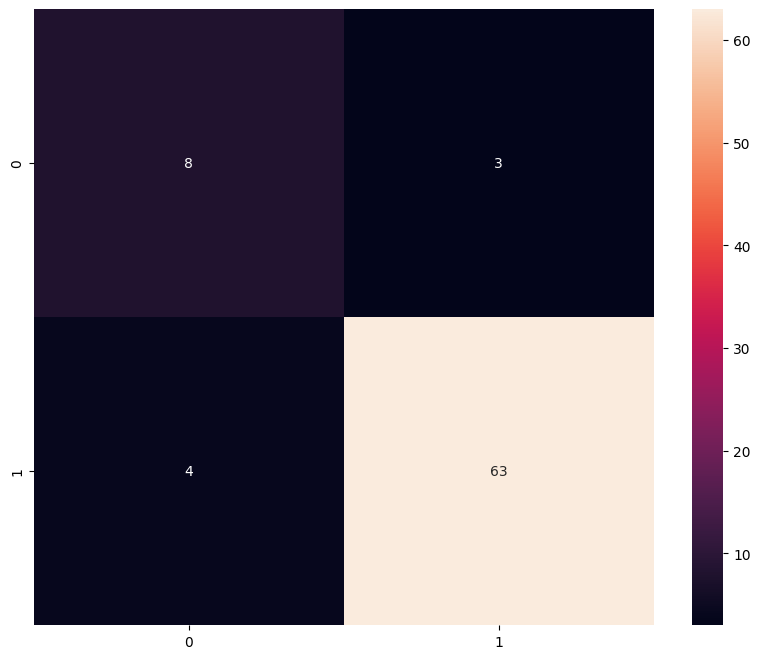

In [47]:
from sklearn.metrics import confusion_matrix
pred = model.predict(xtest)

print(confusion_matrix(pred,ytest))

plt.figure(figsize=(10,8))
sb.heatmap(confusion_matrix(pred,ytest), annot=True);

Predicting outcome using the model

In [51]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income(No Income: 0,Below Rs.10000: 1,10001 to 25000: 2,25001 to 50000: 3,More than 50000: 4): "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
features = ny.array([[a, b, c, d, e, f, g, h]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 25
Enter the Gender of the Customer (1 = Male, 0 = Female): 0
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 2
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Monthly Income(No Income: 0,Below Rs.10000: 1,10001 to 25000: 2,25001 to 50000: 3,More than 50000: 4): 3
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 2
Family Size: 4
Pin Code: 560100
Finding if the customer will order again:  ['Yes']
